<a href="https://colab.research.google.com/github/Navakanesh/bathtub_model/blob/main/Inundation_connected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rasterio matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 92.1 MB/s eta 0:00:00


In [ ]:
!pip install rasterio matplotlib numpy scipy

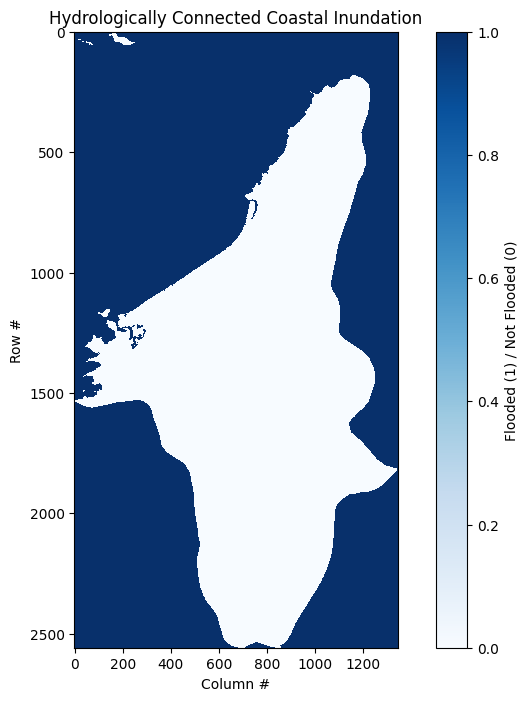

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Load DEM data
with rasterio.open('/content/KB.tif') as src:
    dem = src.read(1)
    meta = src.meta.copy()

# Define flood elevation
flood_elevation = 1

# Initial inundation mask (bathtub approach)
inundation_raw = (dem <= flood_elevation).astype(np.uint8)

# Identify coastline pixels (assumed DEM edges touching sea level or below)
coastline_mask = np.zeros_like(inundation_raw)
coastline_mask[0, :] = inundation_raw[0, :]
coastline_mask[-1, :] = inundation_raw[-1, :]
coastline_mask[:, 0] = inundation_raw[:, 0]
coastline_mask[:, -1] = inundation_raw[:, -1]

# Connected component labeling starting from coastline
structure = np.ones((3, 3), dtype=int)
labeled_array, num_features = label(inundation_raw, structure=structure)

# Find labels connected to coastline
coastline_labels = np.unique(labeled_array[coastline_mask == 1])

# Hydrologically connected inundation
inundation_connected = np.isin(labeled_array, coastline_labels).astype(np.uint8)

# Update metadata, remove nodata
meta.update(dtype=rasterio.uint8, nodata=None)

# Save inundation raster (hydrologically connected)
with rasterio.open('inundation_connected.tif', 'w', **meta) as dst:
    dst.write(inundation_connected, 1)

# Visualization
plt.figure(figsize=(10, 8))
plt.imshow(inundation_connected, cmap='Blues', interpolation='none')
plt.title('Hydrologically Connected Coastal Inundation')
plt.colorbar(label='Flooded (1) / Not Flooded (0)')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()

